In [2]:
import tensorflow as tf

In [3]:
a = tf.constant(2)
b = tf.constant(3)
c = a+b

In [4]:
sess = tf.Session()
sess.run(c)

5

In [5]:
a

<tf.Tensor 'Const:0' shape=() dtype=int32>

In [6]:
a_val = sess.run(a)
a_val

2

In [7]:
a = tf.constant([[3, 3]])
b = tf.constant([[3], [3]])

sess.run(tf.matmul(a,b))

array([[18]], dtype=int32)

In [8]:
# Session

In [9]:
a = tf.constant(5)
b = tf.constant(6)
c = tf.add(a, b)
with tf.Session() as sess:
    print(c.eval())
    print(sess.run(c))

11
11


In [10]:
# Variables

In [11]:
var1 = tf.Variable(100)
var2 = tf.Variable(200)

Sum = tf.add(var1, var2)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(Sum)

Instructions for updating:
Colocations handled automatically by placer.


300

In [12]:
var1.assign(1000)
sess.run(var1)

100

In [13]:
sess.run(var1.assign(1000))

1000

In [14]:
sess.run(var1)

1000

In [15]:
sess.run(Sum)

1200

In [16]:
# PlaceHolder

In [17]:
x = tf.placeholder(tf.int32)
y = x * tf.constant(2)
sess.run(y, feed_dict={x:100})

200

In [18]:
x = tf.placeholder(tf.int32)
y = x * 12
sess.run(y, feed_dict={x:[1,2]})

array([12, 24], dtype=int32)

In [19]:
x = tf.placeholder(tf.int32, shape=(2,3))
y = x * 10
sess.run(y, feed_dict={x:[[1,2,3], [4,5,6]]})

array([[10, 20, 30],
       [40, 50, 60]], dtype=int32)

# MNIST-TensorFlow

In [20]:
from tensorflow.examples.tutorials.mnist import input_data

In [22]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [23]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x6327c4310>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x6327d2850>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1a36c3be50>)

In [24]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [25]:
mnist.validation.images.shape

(5000, 784)

In [26]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [27]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

In [28]:
import numpy as np
import matplotlib.pyplot as plt

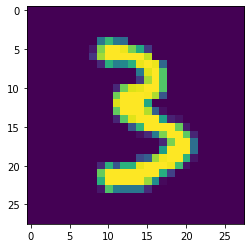

In [29]:
first_image = mnist.train.images[412]
first_image = np.array(first_image, dtype="float")
first_image = first_image.reshape((28, 28))
plt.imshow(first_image)
plt.show()

# Initiallising Weights and Biases

In [30]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1' : tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'h1' : tf.Variable(tf.random_normal([n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_classes]))
}

In [31]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_1:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_2:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_6:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_7:0' shape=(10,) dtype=float32_ref>]

# Forward Propagation

In [32]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output

# Finding Prediction and Accuracy

In [33]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
x = tf.placeholder('float', [None, n_input])
# None coz we don't know how many images are going to come.
y = tf.placeholder('int32', [None, n_classes])
# This x can sometime be training data and sometimes it'll be testing.
pred = forward_propagation(x, weights, biases)

prediction = tf.argmax(pred, 1)
# We want the index where the max value is
true_labels = tf.argmax(y, 1)
correct_prediction = tf.equal(prediction, true_labels)

prediction_eval, labels, correct_pred = sess.run([prediction, true_labels, correct_prediction], feed_dict={x:mnist.test.images, y:mnist.test.labels})
prediction_eval, labels, correct_pred

(array([0, 0, 6, ..., 6, 6, 0]),
 array([7, 2, 1, ..., 4, 5, 6]),
 array([False, False, False, ..., False, False, False]))

In [34]:
correct_pred.sum()

914

# Now Using optimizer and cost

In [35]:
from tensorflow.examples.tutorials.mnist import input_data

In [36]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [37]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1a432a8e90>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1a438b2bd0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1a441d97d0>)

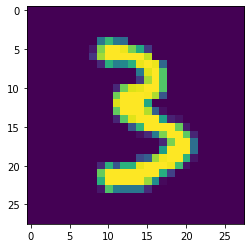

In [38]:
first_image = mnist.train.images[412]
first_image = np.array(first_image, dtype="float")
first_image = first_image.reshape((28, 28))
plt.imshow(first_image)
plt.show()

In [39]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1' : tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'h1' : tf.Variable(tf.random_normal([n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_classes]))
}

In [40]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output

In [41]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
x = tf.placeholder('float', [None, n_input])
# for shape we use None coz we don't know how many images are going to come.
y = tf.placeholder('int32', [None, n_classes])
# This x can sometime be training data and sometimes it'll be testing.
pred = forward_propagation(x, weights, biases)

In [42]:
# Cost Function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [43]:
# Running The Optimizer
# To create optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)
# It will try to reduce the cost

In [45]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [46]:
# Running Multiple Iterations in Batches
batch_size = 100
for i in range(25):
    num_batches = len(mnist.train.images) / batch_size
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Already comes with mnist
        # Instead to passing whole data we're passing into batch
        c, _ = sess.run([cost,optimize], feed_dict={x:batch_x, y:batch_y})
        # So the cost gets reduce every time we run it.
        # So basically it is changing the weights to reduce the cost maybe by doig backpropagation.
        # So now we don't have to change the weights by our ownself
        # So eventually after running it multiple time we'll reach to the weights where cost is minimum.
        total_cost += c
    print(total_cost)
# We'll see cost to be higher this is coz we're adding the cost

26059.693743407726
4295.369030574337
2322.7202498612005
1585.1232774850093
1342.9138536087016
1122.0988779497163
982.5519158321722
907.1260238783178
828.6287410729426
729.7008293081258
673.4873272233018
545.6909798930388
496.4638876526321
405.50991659341105
405.234995230506
416.98322899475033
436.3425618143789
268.15081143909845
262.32285763818425
216.13711762658377
202.34803230104347
186.8236653187582
188.97783758052088
138.45423056354247
123.49407909984483


In [47]:
prediction = tf.argmax(pred, 1)
# We want the index where the max value is
true_labels = tf.argmax(y, 1)
correct_prediction = tf.equal(prediction, true_labels)
# For testing data
prediction_eval, labels, correct_pred = sess.run([prediction, true_labels, correct_prediction], feed_dict={x:mnist.test.images, y:mnist.test.labels})

In [48]:
prediction_eval, labels, correct_pred

(array([7, 2, 1, ..., 4, 5, 6]),
 array([7, 2, 1, ..., 4, 5, 6]),
 array([ True,  True,  True, ...,  True,  True,  True]))

In [49]:
correct_pred.sum()

9559

In [50]:
# For training data
prediction_eval, labels, correct_pred = sess.run([prediction, true_labels, correct_prediction], feed_dict={x:mnist.train.images, y:mnist.train.labels})

In [51]:
prediction_eval, labels, correct_pred

(array([4, 6, 5, ..., 9, 2, 1]),
 array([4, 6, 5, ..., 9, 2, 1]),
 array([ True,  True,  True, ...,  True,  True,  True]))

In [52]:
correct_pred.sum()

53840